# Problem_1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_open_by_numpy():
    # np.loadtxt(구분자 = ',', 데이터 타입: string)
    np_arr = np.loadtxt('NFLX.csv', delimiter=",", encoding='cp949', dtype=str)
    return np_arr

arr = file_open_by_numpy()
# print(arr)
df = pd.DataFrame(arr)
# print(df)

# 컬럼명 지정하면서 생성하기
# 인덱스명도 지정하면서 할 수 있다.
columns=arr[0]
arr = np.delete(arr, 0, 0)
df = pd.DataFrame(arr, columns=columns)
# print(df)
# print(df.loc[3])

df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
# Close 타입을 float로 변경
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month

df = df.loc[:, 'Date':'Close']
# Date에서 Close까지만 읽어오기
df['Date'] = pd.to_datetime(df['Date'])
# Date의 형식을 datetime으로 변경

print(df)

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13768\979417355.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


           Date        Open        High         Low       Close
0    2018-02-05  262.000000  267.899994  250.029999  254.259995
1    2018-02-06  247.699997  266.700012  245.000000  265.720001
2    2018-02-07  266.579987  272.450012  264.329987  264.559998
3    2018-02-08  267.079987  267.619995  250.000000  250.100006
4    2018-02-09  253.850006  255.800003  236.110001  249.470001
...         ...         ...         ...         ...         ...
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013

[1009 rows x 5 columns]


# Problem_2

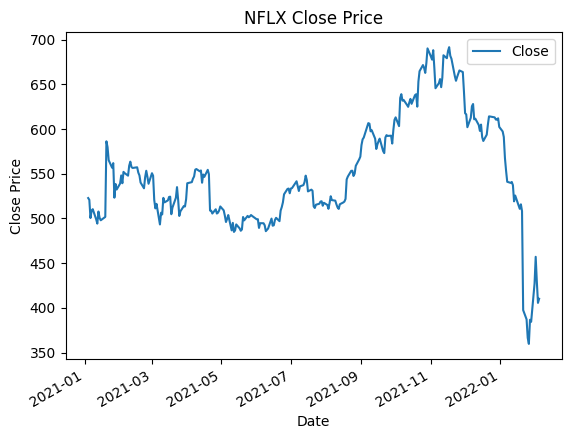

In [4]:
df = df.loc[:, 'Date':'Close']
# Date에서 Close까지만 읽어오기
df['Date'] = pd.to_datetime(df['Date'])
# Date의 형식을 datetime으로 변경
idxs = df[df['Date'] < "2021-01-01"].index
df.drop(idxs, inplace=True)
# 2021년 이후의 데이터만 추리는 과정



df.plot('Date', 'Close')
plt.title("NFLX Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()
# 데이터 전처리 - 2021년 이후의 종가 데이터 출력

# Problem_3

In [3]:
df = df.loc[:, 'Date':'Close']
# Date에서 Close까지만 읽어오기
df['Date'] = pd.to_datetime(df['Date'])
# Date의 형식을 datetime으로 변경
idxs = df[df['Date'] < "2021-01-01"].index
df.drop(idxs, inplace=True)
# 2021년 데이터만 추리는 과정

max_price = df['Close'].max()
min_price = df['Close'].min()
print('최고 종가:', max_price)
print('최저 종가:', min_price)
# 종가의 최대값, 최소값을 구함

최고 종가: 691.690002
최저 종가: 359.700012


# Problem_4

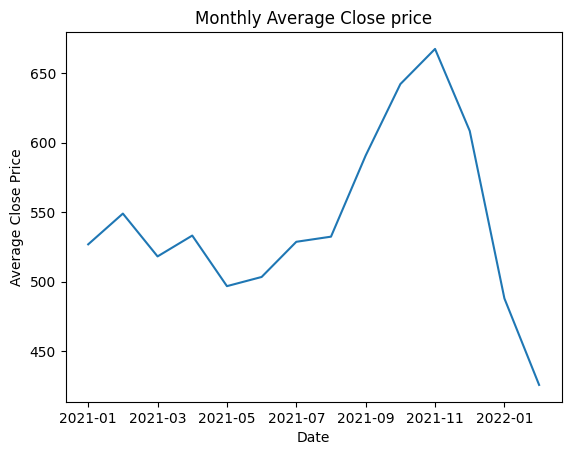

In [5]:
df = df.loc[:, 'Date':'Close']
# Date에서 Close까지만 읽어오기
df['Date'] = pd.to_datetime(df['Date'])
# Date의 형식을 datetime으로 변경
idxs = df[df['Date'] < "2021-01-01"].index
df.drop(idxs, inplace=True)
# 2021년 데이터만 추리는 과정

# max_df = df.max()
# print(max_df)
# 각 항목별 최대값 구하기

df['Y_M'] = df['Date'].dt.strftime("%Y-%m")
# Date의 형식을 연, 월만 나오게 하는 Y_M 형태를 추가
# print(df)

mean_df = df.groupby('Y_M')['Close'].mean()
# 동일한 연-월을 기준으로 그룹화해서 그 때의 종가의 평균값을 구함
# print(mean_df)

mean_df.plot()
plt.title("Monthly Average Close price")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.show()
# 위의 mean_df를 시각화하는 과정

# Problem_5

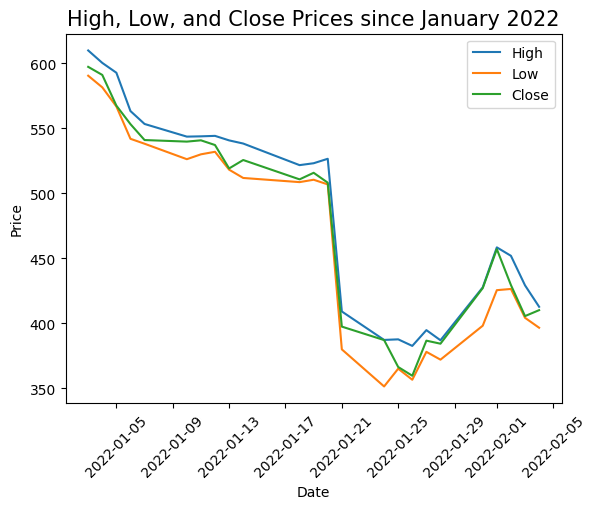

In [9]:
df = df.loc[:, 'Date':'Close']
# Date에서 Close까지만 읽어오기
df['Date'] = pd.to_datetime(df['Date'])
# Date의 형식을 datetime으로 변경


idxs_2 = df[df['Date'] < "2022-01-01"].index
df.drop(idxs_2, inplace=True)
# print(df)

fig, ax = plt.subplots()
ax.plot(df['Date'], df['High'], label = 'High')
ax.plot(df['Date'], df['Low'], label = 'Low')
ax.plot(df['Date'], df['Close'], label = 'Close')
plt.title('High, Low, and Close Prices since January 2022',fontsize=15) 
## 타이틀 설정
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()